# Tarea semanal 2 - Respuesta en frecuencia de filtros pasivos RLC

![Imagen] (TS2 - consignas.png)

## Introduccion general de la tarea

En esta tarea vamos a incursionar un poco mas en el analisis de filtros pasivos de segundo orden construidos a partir de un circuito RLC. Para ello, vamos a analizar los circuitos poniendo la salida donde esta el elemento en derivacion, que en el caso del circuito a es una resistencia y en el b una resistencia en paralelo con un capacitor

En primera instancia podemos hacer un analisis conceptual para ver a grandes rasgos como funciona el filtro y luego calcular analiticamente la transferencia del circuito. De esta manera vamos a buscar comprobar la teorizado coincida con lo calculado analiticamente.

Como punto de partida, realizamos un analisis en los extremos del circuito al considerar el comportamiento de sus componentes en baja y alta frecuencia. De esta manera, podremos tener un panorama general del comportamiento del filtro y por ejemplo, si para baja frecuencia el Capacitor es un CA y el Inductor es un CC pensamos como se relaciona la Vi con la Vo teniendo asi una idea si dicho filtro deja pasar la señal de entrada o la corta. Esto mismo, lo hacemos en alta frecuencia en donde el Capacitor es una CC y el inductor un CA. 

Una vez hecho esto, pasamos a calcular la transferencia ( $ H(s) $ ) al pasar los componentes al dominio de Laplace teniendo la impedancia de cada uno de ellos. Con todo esto, obtenemos $ \frac{V_o}{V_i} $ y comenzamos en analisis requerido en los puntos 1, 2 y 3. 



## Comienzo de las resoluciones del circuito A

### 1) Calculamos la funcion transferencia

Vamos a pasar todos los componentes al dominio de Laplace, por lo cual las impedancias de los mismos nos quedan de la siguiente manera:

### $$ Z_L = sL  ;  Z_C = \frac{1}{sC}  ;  Z_R = R $$

Una vez tomamos todos los elementos en Laplace, procedemos a calcular la transferencia:

### $$ \frac{V_o}{V_i} = H(s) = \frac{Z_R }{ Z_R Z_L Z_C} = \frac{R}{ R + sL + \frac{1}{sC}} = \frac{R}{ \frac{1}{sC} (s R C + s^2 L C + 1)} $$

### $$ H(s) =  \frac{R}{ \frac{1}{sC} L C ( s^2 + s \frac{R}{L} + \frac{1}{L C} )} = \frac{s \frac{R}{L} }{s^2 + s \frac{R}{L} + \frac{1}{LC} } $$

Ahora, vamos a tomar:

### $$ \frac{w_0}{Q} = \frac{R}{L}  ;   w^2_0 = \frac{1}{L C} $$

Con lo que nos quedaria la transferencia como:

### $$ H(s) = \frac{s \frac{w_0}{Q} }{s^2 + s \frac{w_0}{Q} + w^2_0 } $$



Ya con la transferencia calculada vamos a pasar todo a jw, de manera que podamos calcular su modulo para así graficarlo 

### $$ H(jw) =  \frac{jw \frac{R}{L} }{-w^2 + jw \frac{R}{L} + \frac{1}{LC} } $$

### $$ |H(jw)| = \frac{jw \frac{R}{L} }{ \sqrt{ ( \frac{1}{LC}-w^2)^2 + (\frac{R}{L})^2 w^2  }  } $$

Con esto podemos observar que:

### $$ w \rightarrow 0 \Rightarrow |H(jw)| \rightarrow 0 $$
### $$ w \rightarrow  \infty \Rightarrow |H(jw)| \rightarrow 0 $$

Este ultimo viene de tomar el limite de w tendiendo a infinito:

### $$ \lim_{w \to \infty} |H(jw)| \simeq \frac{w}{\sqrt{2w^4}} \simeq \frac{1}{2w} \rightarrow 0 $$

Por otro lado, puedo ver que cuando $ w = w_0 = \frac{1}{\sqrt{LC}} $ vamos a tener un maximo en $|H(jw)|$, siendo $ H(jw_0) = \frac{1}{w_0} = \sqrt{LC} $

Con todo esto, podemos preveer que el comportamiento del circuito es el de un **Pasa Banda**, ya que, tanto para alta como baja frecuencia no deja pasar nada y vamos a tener una frecuencia $w_0$ en la cual tenemos el maximo de la transferencia que va a ser la banda de paso por la cual queremos que el filtro deje pasar nuestra señal, limpiando de esa manera tanto bajas como altas frecuencias.


### 2) Calculamos la respusta en modulo y fase para luego poder graficarla. 

De antes, ya tenemos que la respuesta en modulo es:

### $$ |H(jw)| = \frac{jw \frac{R}{L} }{ \sqrt{ ( \frac{1}{LC}-w^2)^2 + (\frac{R}{L})^2 w^2  }  } $$

Para ello, vamos a utilizar un codigo de python para graficar la respuesta en modulo del circuito:

 **Disclaimer** ; Este codigo lo generé a partir de chat GPT. No me gusta que no queda bien alineada la $w_c1$ al corte de los 3dB 


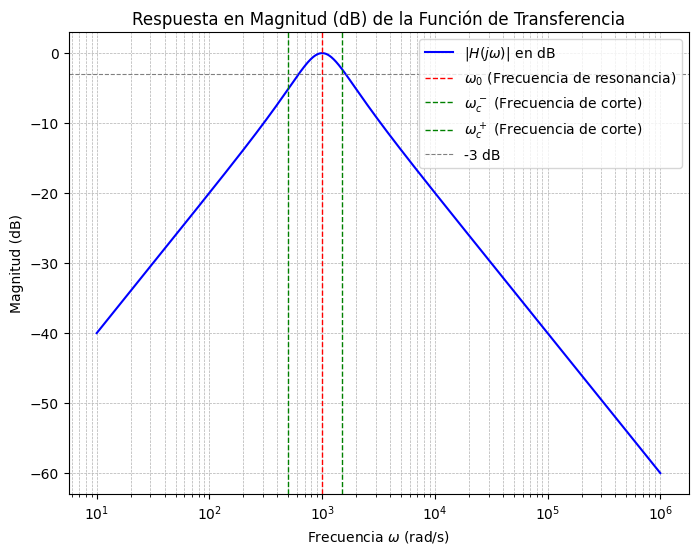

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir valores de los componentes
R = 10      # Resistencia en ohmios
L = 0.01    # Inductancia en henrios
C = 0.0001  # Capacitancia en faradios

# Calcular la frecuencia de resonancia
w0 = 1 / np.sqrt(L * C)  # Frecuencia de resonancia (rad/s)

# Calcular las frecuencias de corte (-3 dB)
w_c1 = w0 - (R / (2 * L))  # Frecuencia de corte inferior
w_c2 = w0 + (R / (2 * L))  # Frecuencia de corte superior

# Definir el rango de frecuencias en rad/s
w = np.logspace(1, 6, 1000)  # De 10^1 a 10^6 rad/s

# Calcular la función de transferencia en módulo
num = w * (R / L)
den = np.sqrt((1 / (L * C) - w**2)**2 + (R / L)**2 * w**2)
H_w = num / den  # Módulo de la función de transferencia

# Convertir a dB
H_dB = 20 * np.log10(H_w)

# Determinar el valor máximo de la respuesta en dB
H_max_dB = max(H_dB)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(w, H_dB, label=r'$|H(j\omega)|$ en dB', color='b')

# Marcar la frecuencia de resonancia
plt.axvline(x=w0, color='r', linestyle='--', linewidth=1, label=r'$\omega_0$ (Frecuencia de resonancia)')

# Marcar las frecuencias de corte correctamente
plt.axvline(x=w_c1, color='g', linestyle='--', linewidth=1, label=r'$\omega_c^-$ (Frecuencia de corte)')
plt.axvline(x=w_c2, color='g', linestyle='--', linewidth=1, label=r'$\omega_c^+$ (Frecuencia de corte)')

# Línea de referencia en -3 dB
plt.axhline(y=H_max_dB - 3, color='gray', linestyle='--', linewidth=0.8, label='-3 dB')

# Etiquetas y formato
plt.xscale('log')  # Escala logarítmica en el eje x
plt.xlabel(r'Frecuencia $\omega$ (rad/s)')
plt.ylabel(r'Magnitud (dB)')
plt.title('Respuesta en Magnitud (dB) de la Función de Transferencia')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()



Donde podemos ver el comportamiento del modulo en dB. Es importante recalcar, que tenemos zonas en las cuales tenemos un crecimiento y decrecimiento asindotico que obedecen una pendiente de $ \frac{\pm 20 dB}{Dec} $. Y cuando tenemos una frecuencia $w_0$, como antes se mencionó, es cuando tenemos la maxima transferencia; En otras palabras, cuando el filtro " Deja pasar todo " y a partir de allí tenemos a ambos lados el ancho de banda de $ \pm 3 db $ en el cual consideramos a nuestro filtro activo 

### 3) De que filtro se trata ?

Con todo lo expuesto anteriormente, podemos finalmente concluir que estamos frente a un filtro **Pasa Banda** el cual tiene una frecuencia de resonancia $w_0 = \frac{1}{\sqrt{LC}} $ y un ancho de banda de $\pm 3dB$ a partir de dicha $w_0$.

En definitiva, a partir de los valores que le damos a nuestros componentes del circuito vamos a tener una frecuencia $w_0$ en la cual vamos a permitir a nuestra señal que pase limpiando todo lo que no se encuentre dentro del BW antes definido. Por lo que, si queremos una señal la cual sabemos que tiene una frecuencia $ w_1 $ podriamos realizar un filtro de este tipo, de manera que limpiemos todo lo de al rededor de dicha frecuencia que sabemos que tiene la señal. Eliminando ruido, y otra informacion que consideremos innecesaria limpiando la señal. 

## Final de resolucion de circuito A

---

## Inicio de resolucion circuito B

## 1) Vamos a calcular la transferencia del circuito 

Al igual que antes llevamos todo al dominio de laplace y a partir de eso calcularmos $ \frac{V_o}{V_i}$, pero a diferencia de antes, como tenemos a la resistencia en paralelo con el inductor vamos a realizar primero el paralelo de ambos:

### $$ Z_L // Z_R = \frac{1}{\frac{1}{sL} + \frac{1}{R}} = \frac{R sL}{ R + sL} $$

Con esto, ya calculamos la transferencia a partir de plantear el divisor resistivo sobre la impedancia en paralelo que tenemos en derivacion:

### $$ \frac{V_o}{V_i} = H(s) = \frac{Z_L // Z_R}{z_C + Z_L // Z_R} = \frac{\frac{R sL}{ R + sL}}{ \frac{1}{sC} + \frac{R sL}{ R + sL}} $$

### $$ H(s) = \frac{\frac{R sL}{ R + sL}}{ \frac{R+sL + (sC) RsL}{(sC)(R+sL)} } = \frac{sC (R+sL) RsL}{(R+sL) (R+sL + (sC) RsL } $$

### $$ H(s) = \frac{s^2 RLC}{R + sL + s^2 RLC} = \frac{s^2 RLC}{RLC(s^2 + s \frac{1}{RC} + \frac{1}{LC})} $$

### $$ \Rightarrow H(s) = \frac{s^2}{s^2 + s \frac{1}{RC} + \frac{1}{LC}} $$

Una vez llegamos a la transferencia vamos a renombar un poco la ecuacion teniendo en cuenta que:

### $$ w_0^2 = \frac{1}{LC} $$ 
### $$ \frac{w_0}{Q}=\frac{1}{RC} $$

Con esto, la ecuacion de la transferencia finalmente nos queda:

### $$ H(s) =  \frac{s^2}{s^2 + s \frac{w_0}{Q} + w_0^2} $$


## 2) Ya con la transferencia calculada, vamos a llevar nuevamente todo a jw para así obtener el modulo de la misma. 

Adicionalmente realizamos un analisis de extremos de dicha transferencia, para que así tengamos una noción de lo que esta sucediendo. Una vez hecho esto, vamos a graficar el modulo de la transferencia en dB

### $$ H(jw) = \frac{(jw)^2}{(jw)^2 + jw \frac{w_0}{Q} + w_0^2} = \frac{-w^2}{-w^2 + jw \frac{w_0}{Q} + w_0^2} $$

### $$ |H(jw)| = \frac{-w^2}{\sqrt{(w_0^2 - w^2)^2 + (w \frac{w_0}{Q})^2}} $$

Realizamos un analisis de extremos de lo obtenido:

### $$ w \rightarrow 0 \Rightarrow \lim_{w \to 0} |H(jw)| = \frac{0}{w_0^2} = 0  $$
### $$ w \rightarrow  \infty \Rightarrow \lim_{w \to \infty} |H(jw)| = \frac{-w^2}{w^2} = 1  $$

Como podemos ver, al realizar este analisis de los extremos podemos intuir que este circuito va a tener un comportamiento esperado como el de un **Pasa Altos**, ya que, para frecuencias bajas estariamos bloqueando la señal y para frecuencias altas dejariamos pasar dichas señales.

Ahora, pasando esta trasferencia a db $ \Rightarrow |H(jw)|dB = 20 log(|H(jw)|) $ vamos a graficar lo obtenido:

**Disclaimer**, este grafico tambien fue realizado con chat GPT

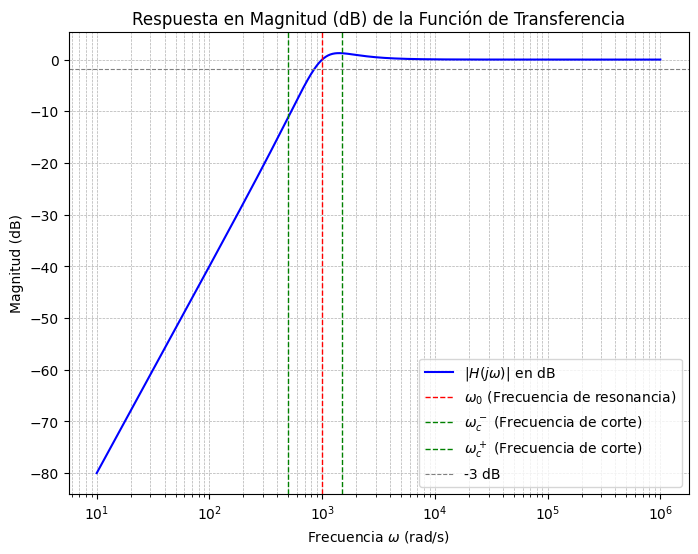

Frecuencia de resonancia (ω₀): 1000.00 rad/s
Frecuencia de corte inferior (ωc⁻): 500.00 rad/s
Frecuencia de corte superior (ωc⁺): 1500.00 rad/s
Ancho de banda (BW): 1000.00 rad/s


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir valores de los componentes
R = 10      # Resistencia en ohmios
L = 0.01    # Inductancia en henrios
C = 0.0001  # Capacitancia en faradios

# Calcular la frecuencia de resonancia
w0 = np.sqrt(1 / (L * C))  # Frecuencia de resonancia (rad/s)

# Calcular el factor de calidad Q
Q = w0 * R * C  

# Calcular las frecuencias de corte (-3 dB)
w_c1 = w0 - (w0 / (2 * Q))  # Frecuencia de corte inferior
w_c2 = w0 + (w0 / (2 * Q))  # Frecuencia de corte superior

# Calcular el ancho de banda
BW = w_c2 - w_c1  

# Definir el rango de frecuencias en rad/s
w = np.logspace(1, 6, 1000)  # De 10^1 a 10^6 rad/s

# Calcular la función de transferencia en módulo
num = -w**2  # Numerador
den = np.sqrt((w0**2 - w**2)**2 + (w * w0 / Q)**2)  # Denominador
H_w = num / den  # Módulo de la función de transferencia

# Convertir a dB (tomando el valor absoluto para evitar errores con log)
H_dB = 20 * np.log10(np.abs(H_w))

# Determinar el valor máximo de la respuesta en dB
H_max_dB = max(H_dB)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(w, H_dB, label=r'$|H(j\omega)|$ en dB', color='b')

# Marcar la frecuencia de resonancia
plt.axvline(x=w0, color='r', linestyle='--', linewidth=1, label=r'$\omega_0$ (Frecuencia de resonancia)')

# Marcar las frecuencias de corte correctamente
plt.axvline(x=w_c1, color='g', linestyle='--', linewidth=1, label=r'$\omega_c^-$ (Frecuencia de corte)')
plt.axvline(x=w_c2, color='g', linestyle='--', linewidth=1, label=r'$\omega_c^+$ (Frecuencia de corte)')

# Línea de referencia en -3 dB
plt.axhline(y=H_max_dB - 3, color='gray', linestyle='--', linewidth=0.8, label='-3 dB')

# Etiquetas y formato
plt.xscale('log')  # Escala logarítmica en el eje x
plt.xlabel(r'Frecuencia $\omega$ (rad/s)')
plt.ylabel(r'Magnitud (dB)')
plt.title('Respuesta en Magnitud (dB) de la Función de Transferencia')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Imprimir resultados clave
print(f"Frecuencia de resonancia (ω₀): {w0:.2f} rad/s")
print(f"Frecuencia de corte inferior (ωc⁻): {w_c1:.2f} rad/s")
print(f"Frecuencia de corte superior (ωc⁺): {w_c2:.2f} rad/s")
print(f"Ancho de banda (BW): {BW:.2f} rad/s")


AL igual que antes, es importante recalcar, que tenemos una zona en las cual tenemos un crecimiento asindotico que obedecen una pendiente de $ \frac{\pm 20 dB}{Dec} $. Que cuando llegamos a una atenuación de $ -3dB $ es cuando vamos a considerar activo a este filtro, por lo que, a partir de este momento tomamos que la señal pasa a la salida transmitiendo toda la informacion que tenia en la entrada para esas frecuencias. En este caso esto ocurriria para $ w = 8*10^2 \frac{rad}{s} $

## 3) Entonces que tipo de filtro tenemos ?

Habiendo hecho previamente el analisis de extremos, en el cual ya intuimos que el filtro se comporta como un **Pasa Altos** y a su vez, luego de haber graficado la transferencia en dB podemos confirmar que este filtro tiene un comportamiento como el de un **Pasa Altos**.

Esto debido a que para bajas frecuencias vemos que tenemos una alta atenuacion lo que impide que tengamos señales a la salida con dichas frecuencias. A si mismo, vemos que hasta los $ -3dB $ el filtro sube de manera asintotica y a partir de allí consideramos que el filtro deja pasar a la señal de entrada

---

## Bonus

💎 Cómo calcularía la salida de cada filtro (en régimen permanente) si a Vi fuera una senoidal de frecuencia arbitraria f0 ?

En este caso, estando en regimen permanente llevaria al seno al dominio de Laplace y lo multiplicaría por la transferencia del mismo, ya que, como en el tiempo tendriamos una **convolucion** pero al pasar al dominio de Laplace generamos que esto se pueda tomar como una multiplicacion, lo que facilita enormemente la operacion:

$$ Si \rightarrow v_i(t) = A \sin(w t + \phi) $$

$$ \Rightarrow V_o(s) = H(s) V_i(s) $$

De esta manera, rapidamente obtenemos la señal a la salida del filtro y finalmente podemos realizar la antitransformada de laplace para llevar nuestra expresion del dominio de Laplace al tiempo

$$ \mathcal{L}^{-1} \left\{ V_o(s) \right\} = V_o(t) $$



🤯 ¿Cómo se podrían conectar en cascada ambos filtros y qué respuesta sería la resultante?

Para poder conectar 2 filtros vamos a poner en medio de ellos un **Amplificador Operacional** en configuracion seguidor o buffer, de manera que aislamos las etapas. Es decir, que de esta manera no cargamos al segundo filtro con la impedancia del primero. Esto es debido a que al operacional no ingresa corriente y tiene una impedancia infinita, por lo que, " aisla " a las 2 etapas. Por otro lado, el operacional en esa configuracion lleva la tension que tiene a la entrada a la salida. De esta manera, llevamos la señal filtrada de la primera etapa para luego ser trabajada en la segunda etapa. 

En este caso, tendriamos un **Pasa Banda** en cascada con un **Pasa Altos**, lo que hace que a la salida tengamos sobre todo el BW del Pasa Altos que aumenta un poco mas debido a la contribucion del Pasa altos en la segunda etapa. Podemos graficar esto:

**Disclaimer**, Esta grafico fue hecho con chat GPT


<IPython.core.display.Math object>

<IPython.core.display.Math object>

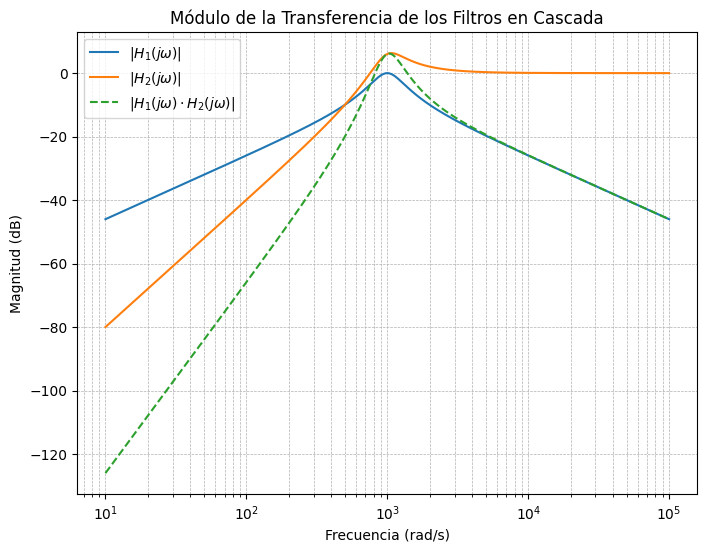

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, freqresp
from IPython.display import display, Math

# Parámetros del filtro
w0 = 1000  # Frecuencia central (rad/s)
Q = 2  # Factor de calidad

# Mostrar ecuaciones en LaTeX
display(Math(r"H_1(s) = \frac{s \frac{\omega_0}{Q}}{s^2 + s \frac{\omega_0}{Q} + \omega_0^2}"))
display(Math(r"H_2(s) = \frac{s^2}{s^2 + s \frac{\omega_0}{Q} + \omega_0^2}"))

# Definir las funciones de transferencia
num1 = [w0/Q, 0]  # Numerador del primer filtro
den1 = [1, w0/Q, w0**2]  # Denominador del primer filtro

num2 = [1, 0, 0]  # Numerador del segundo filtro
den2 = [1, w0/Q, w0**2]  # Denominador del segundo filtro

# Crear los sistemas de transferencia
H1 = TransferFunction(num1, den1)
H2 = TransferFunction(num2, den2)

# Sistema en cascada: Multiplicación de funciones de transferencia
num_total = np.polymul(num1, num2)
den_total = np.polymul(den1, den2)
H_total = TransferFunction(num_total, den_total)

# Frecuencia de análisis (escala logarítmica)
w = np.logspace(1, 5, 1000)  # Rango de 10^1 a 10^5 rad/s

# Obtener la respuesta en frecuencia (corrigiendo el error)
w, H1_resp = freqresp(H1, w)
_, H2_resp = freqresp(H2, w)
_, H_total_resp = freqresp(H_total, w)

# Convertir magnitud a dB
mag1_db = 20 * np.log10(abs(H1_resp))
mag2_db = 20 * np.log10(abs(H2_resp))
mag_total_db = 20 * np.log10(abs(H_total_resp))

# Graficar la magnitud en Jupyter
plt.figure(figsize=(8, 6))
plt.semilogx(w, mag1_db, label=r"$|H_1(j\omega)|$")
plt.semilogx(w, mag2_db, label=r"$|H_2(j\omega)|$")
plt.semilogx(w, mag_total_db, label=r"$|H_1(j\omega) \cdot H_2(j\omega)|$", linestyle="--")

# Personalización del gráfico
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Magnitud (dB)")
plt.title("Módulo de la Transferencia de los Filtros en Cascada")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()
